***
## Alzheimer Disease

### *Import libs*

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from scipy import stats

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', palette='coolwarm', rc={'figure.figsize' :(15,10)})


***

## Dataset Loading

### *Load data from local*

- *Using these script to load data from your local*

- *File downloaded required (if not)*

In [8]:
# check for dataset file

local_default_path = "alzheimer_disease_data_custom.csv"
alzheimer_df = pd.read_csv(local_default_path)
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No,XXXConfid
1,4752,89.0,Male,Caucasian,NaN,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No,XXXConfid
2,4753,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No,XXXConfid
3,4754,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No,XXXConfid
4,4755,NaN,Male,Caucasian,NaN,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,5535,62.0,Male,Asian,Bachelor's,37.204794,NaN,15.866661,0.834477,7.408433,8.910176,No,No,No,No,No,No,129.0,112.0,218.898884,61.511821,82.962286,146.182027,0.594672,7.616162,No,No,7.948689,No,No,NaN,NaN,No,No,XXXConfid
2348,6601,83.0,Female,African American,NaN,25.730770,No,15.194961,1.019401,7.670402,6.623771,No,No,No,Yes,No,Yes,97.0,83.0,170.317799,83.735742,97.711721,163.500278,7.830375,2.403691,No,No,7.125541,No,No,NaN,No,No,No,XXXConfid
2349,5528,90.0,NaN,Asian,Bachelor's,15.387136,No,15.821380,NaN,2.240311,6.253344,No,No,No,No,No,No,97.0,61.0,NaN,68.865280,33.995829,60.951975,28.876218,3.136569,No,No,3.733343,No,No,No,NaN,No,No,XXXConfid
2350,6815,74.0,Female,African American,NaN,38.916401,Yes,0.923593,9.658794,9.606757,8.309027,No,Yes,No,NaN,No,No,133.0,68.0,176.426489,163.637099,64.930858,280.277147,22.782386,1.280363,No,No,5.078113,Yes,Yes,Yes,No,Yes,Yes,XXXConfid


### *Load data from Kaggle*

- *Using this script to load dataset if you're working on kaggle Notebook*
- *Import dataset into Kaggle Input Folder required*

- <a href="https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data"> *Original dataset* </a>

In [9]:
# kaggle_file_path = '/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv'
# alzheimer_df_original = pd.read_csv(kaggle_file_path)
# alzheimer_df_original

### *Fetch data from Github*

- *Using these script when you're working on Kaggle or Colab or even local*
- *Not required download file but fetching it instead*

- *Loading speed depends on your network*


In [10]:
# url_path = 'https://raw.githubusercontent.com/lovecrushfamily/Alzheimer_Disease/refs/heads/main/alzheimers_disease_data.csv'
# alzheimer_df = pd.read_csv(url_path)
# alzheimer_df

## Dataset Overview

### *No.Features, No.Samples, Datatypes*

- *2352 samples*

- *35 features*

In [11]:
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No,XXXConfid
1,4752,89.0,Male,Caucasian,NaN,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No,XXXConfid
2,4753,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No,XXXConfid
3,4754,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No,XXXConfid
4,4755,NaN,Male,Caucasian,NaN,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,5535,62.0,Male,Asian,Bachelor's,37.204794,NaN,15.866661,0.834477,7.408433,8.910176,No,No,No,No,No,No,129.0,112.0,218.898884,61.511821,82.962286,146.182027,0.594672,7.616162,No,No,7.948689,No,No,NaN,NaN,No,No,XXXConfid
2348,6601,83.0,Female,African American,NaN,25.730770,No,15.194961,1.019401,7.670402,6.623771,No,No,No,Yes,No,Yes,97.0,83.0,170.317799,83.735742,97.711721,163.500278,7.830375,2.403691,No,No,7.125541,No,No,NaN,No,No,No,XXXConfid
2349,5528,90.0,NaN,Asian,Bachelor's,15.387136,No,15.821380,NaN,2.240311,6.253344,No,No,No,No,No,No,97.0,61.0,NaN,68.865280,33.995829,60.951975,28.876218,3.136569,No,No,3.733343,No,No,No,NaN,No,No,XXXConfid
2350,6815,74.0,Female,African American,NaN,38.916401,Yes,0.923593,9.658794,9.606757,8.309027,No,Yes,No,NaN,No,No,133.0,68.0,176.426489,163.637099,64.930858,280.277147,22.782386,1.280363,No,No,5.078113,Yes,Yes,Yes,No,Yes,Yes,XXXConfid


In [12]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2352 non-null   int64  
 1   Age                        2045 non-null   float64
 2   Gender                     1762 non-null   object 
 3   Ethnicity                  2352 non-null   object 
 4   EducationLevel             1872 non-null   object 
 5   BMI                        2352 non-null   float64
 6   Smoking                    1654 non-null   object 
 7   AlcoholConsumption         2163 non-null   float64
 8   PhysicalActivity           2163 non-null   float64
 9   DietQuality                2156 non-null   float64
 10  SleepQuality               2352 non-null   float64
 11  FamilyHistoryAlzheimers    2352 non-null   object 
 12  CardiovascularDisease      2352 non-null   object 
 13  Diabetes                   2352 non-null   objec

***

## Features Filtering

### Remove irrelevant features

- *PatientID*

- *DoctorInCharge*

In [19]:
# Drop PatientID and DoctorInCharge
alzheimer_df.drop(inplace=True, columns={'DoctorInCharge', 'PatientID'})

### Categorical and Numerical features

- *Select manually*

In [23]:
# 18 categorical features
categorical_features = ['Gender',
                     'Ethnicity',
                     'EducationLevel',
                     'Smoking',
                     'FamilyHistoryAlzheimers',
                     'CardiovascularDisease',
                     'Diabetes',
                     'Depression',
                     'HeadInjury',
                     'Hypertension',
                     'MemoryComplaints',
                     'BehavioralProblems',
                     'Confusion',
                     'Disorientation',
                     'PersonalityChanges',
                     'DifficultyCompletingTasks',
                     'Forgetfulness',]

# 15 numerical features
numerical_features = ['Age',     
                      'BMI',
                      'AlcoholConsumption',
                      'PhysicalActivity',
                      'DietQuality',
                      'SleepQuality',
                      'SystolicBP',
                      'DiastolicBP',
                      'CholesterolTotal',
                      'CholesterolLDL',
                      'CholesterolHDL',
                      'CholesterolTriglycerides',
                      'MMSE',
                      'FunctionalAssessment',
                      'ADL']

target_feature = ["Diagnosis"]

f"Total separated features: {len(categorical_features) + len(numerical_features) + len(target_feature)}" ,"^", f"Total features: {len(alzheimer_df.columns)}"

# alzheimer_df[numerical_features] = alzheimer_df[numerical_features].astype('float')
# alzheimer_df[categorical_features] = alzheimer_df[categorical_features].astype('int')

('Total separated features: 33', '^', 'Total features: 33')

***

## Exploratory Data Analysis

### Missing Value & Duplicated values

<Axes: >

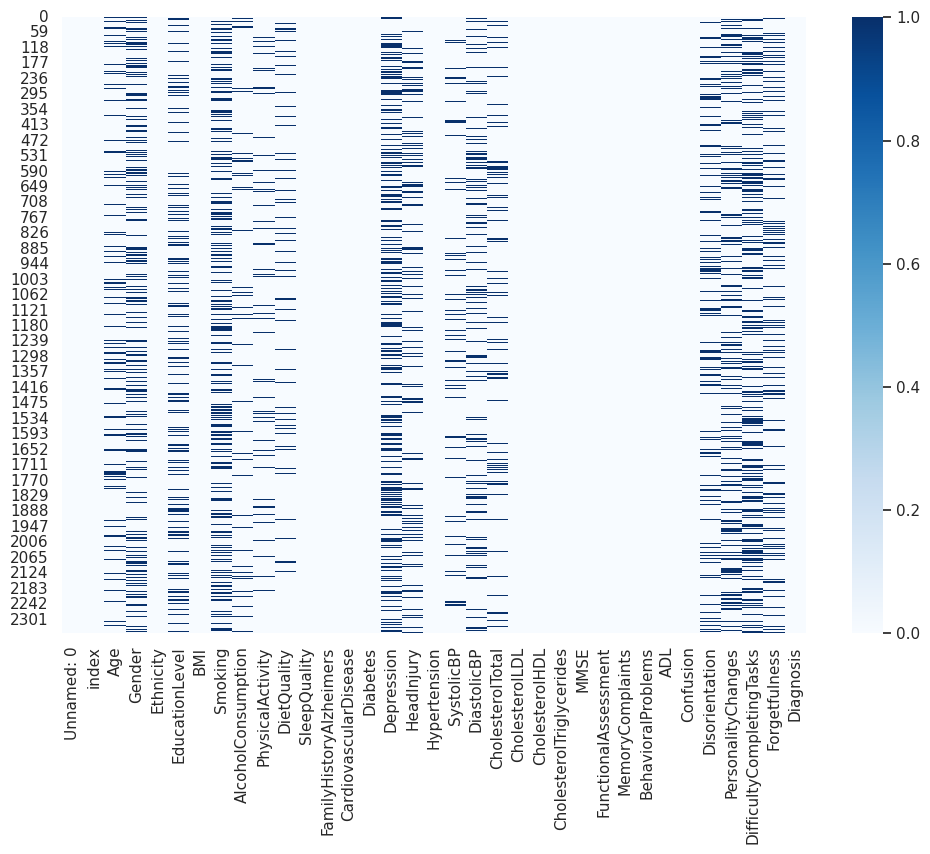

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(alzheimer_df.isnull(), cmap='Blues')


- *handle missing value*

### Numerical Features Exploration

In [ ]:
alzheimer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2352.0,1175.500000,679.108239,0.000000,587.750000,1175.500000,1763.250000,2351.000000
index,2352.0,1074.892857,618.657516,0.000000,539.000000,1073.500000,1612.250000,2148.000000
Age,2042.0,74.854065,9.056156,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2352.0,27.667615,7.209901,15.008851,21.641497,27.814596,33.871494,39.992767
AlcoholConsumption,2162.0,10.501899,9.693062,0.002003,5.221395,9.940010,15.217834,208.000000
PhysicalActivity,2159.0,4.897262,2.862481,0.003616,2.522019,4.773200,7.368700,9.987429
DietQuality,2165.0,4.983537,2.922228,0.009385,2.415080,5.130691,7.577292,9.998346
SleepQuality,2352.0,7.060194,1.779417,4.002629,5.520250,7.123418,8.559487,20.000000
SystolicBP,2181.0,134.104081,25.875083,90.000000,111.000000,134.000000,157.000000,179.000000
DiastolicBP,1948.0,90.080082,17.423330,60.000000,75.000000,91.000000,105.000000,119.000000


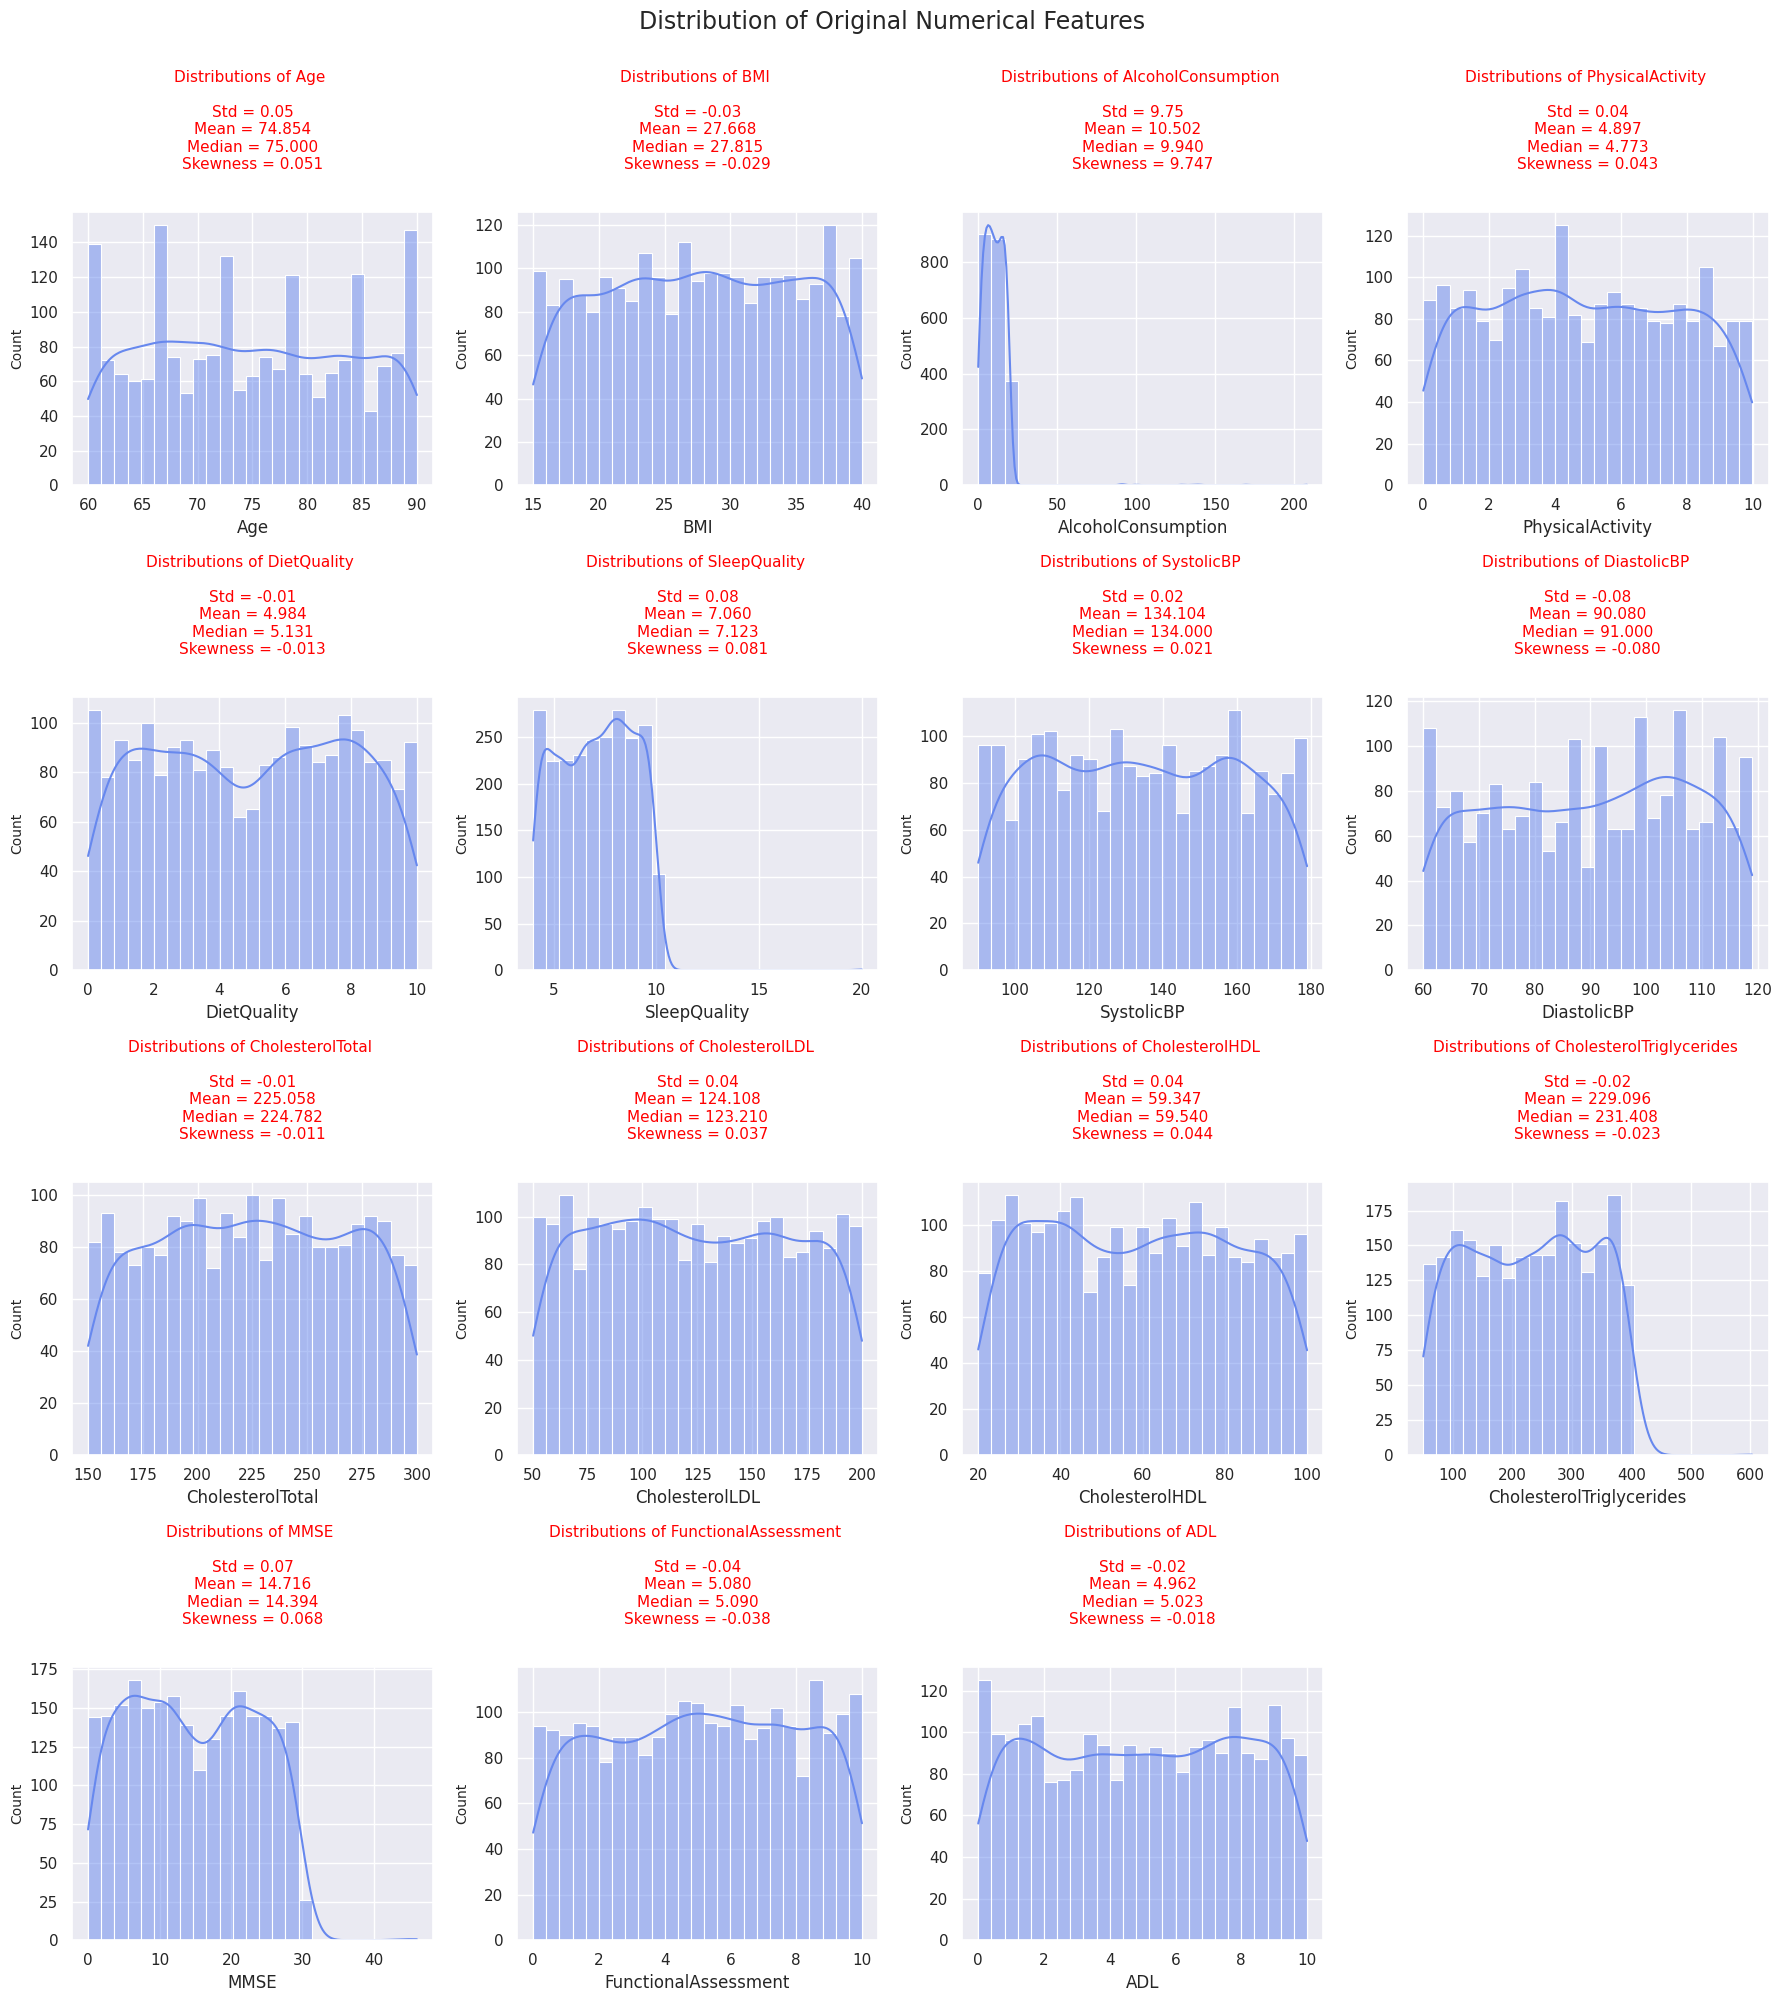

In [ ]:

skewness = alzheimer_df[numerical_features].skew()
mean = alzheimer_df[numerical_features].mean()
median =alzheimer_df[numerical_features].median()
std = alzheimer_df[numerical_features].std()

num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Distribution of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(numerical_features):

    ax = axes[i]
    ax.set_ylabel("", fontsize=10)
    ax.set_title(f'Distributions of {column} \n\n'
                f'Std = {skewness[i]:,.2f}\n'
                f'Mean = {mean[i]:,.3f}\n'
                f'Median = {median[i]:,.3f}\n'
                f'Skewness = {skewness[i]:,.3f}\n\n',
                fontsize=11, 
                color='red')
    
    sns.histplot(alzheimer_df[column], ax=ax, kde=True, bins=25)


# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()



    # f'Correlation with Diagnosis = {corr_with_diagnosis.values[0][1]:,.3f}\n',
    # corr_with_diagnosis = alzheimer_df[["Diagnosis", column]].corr()


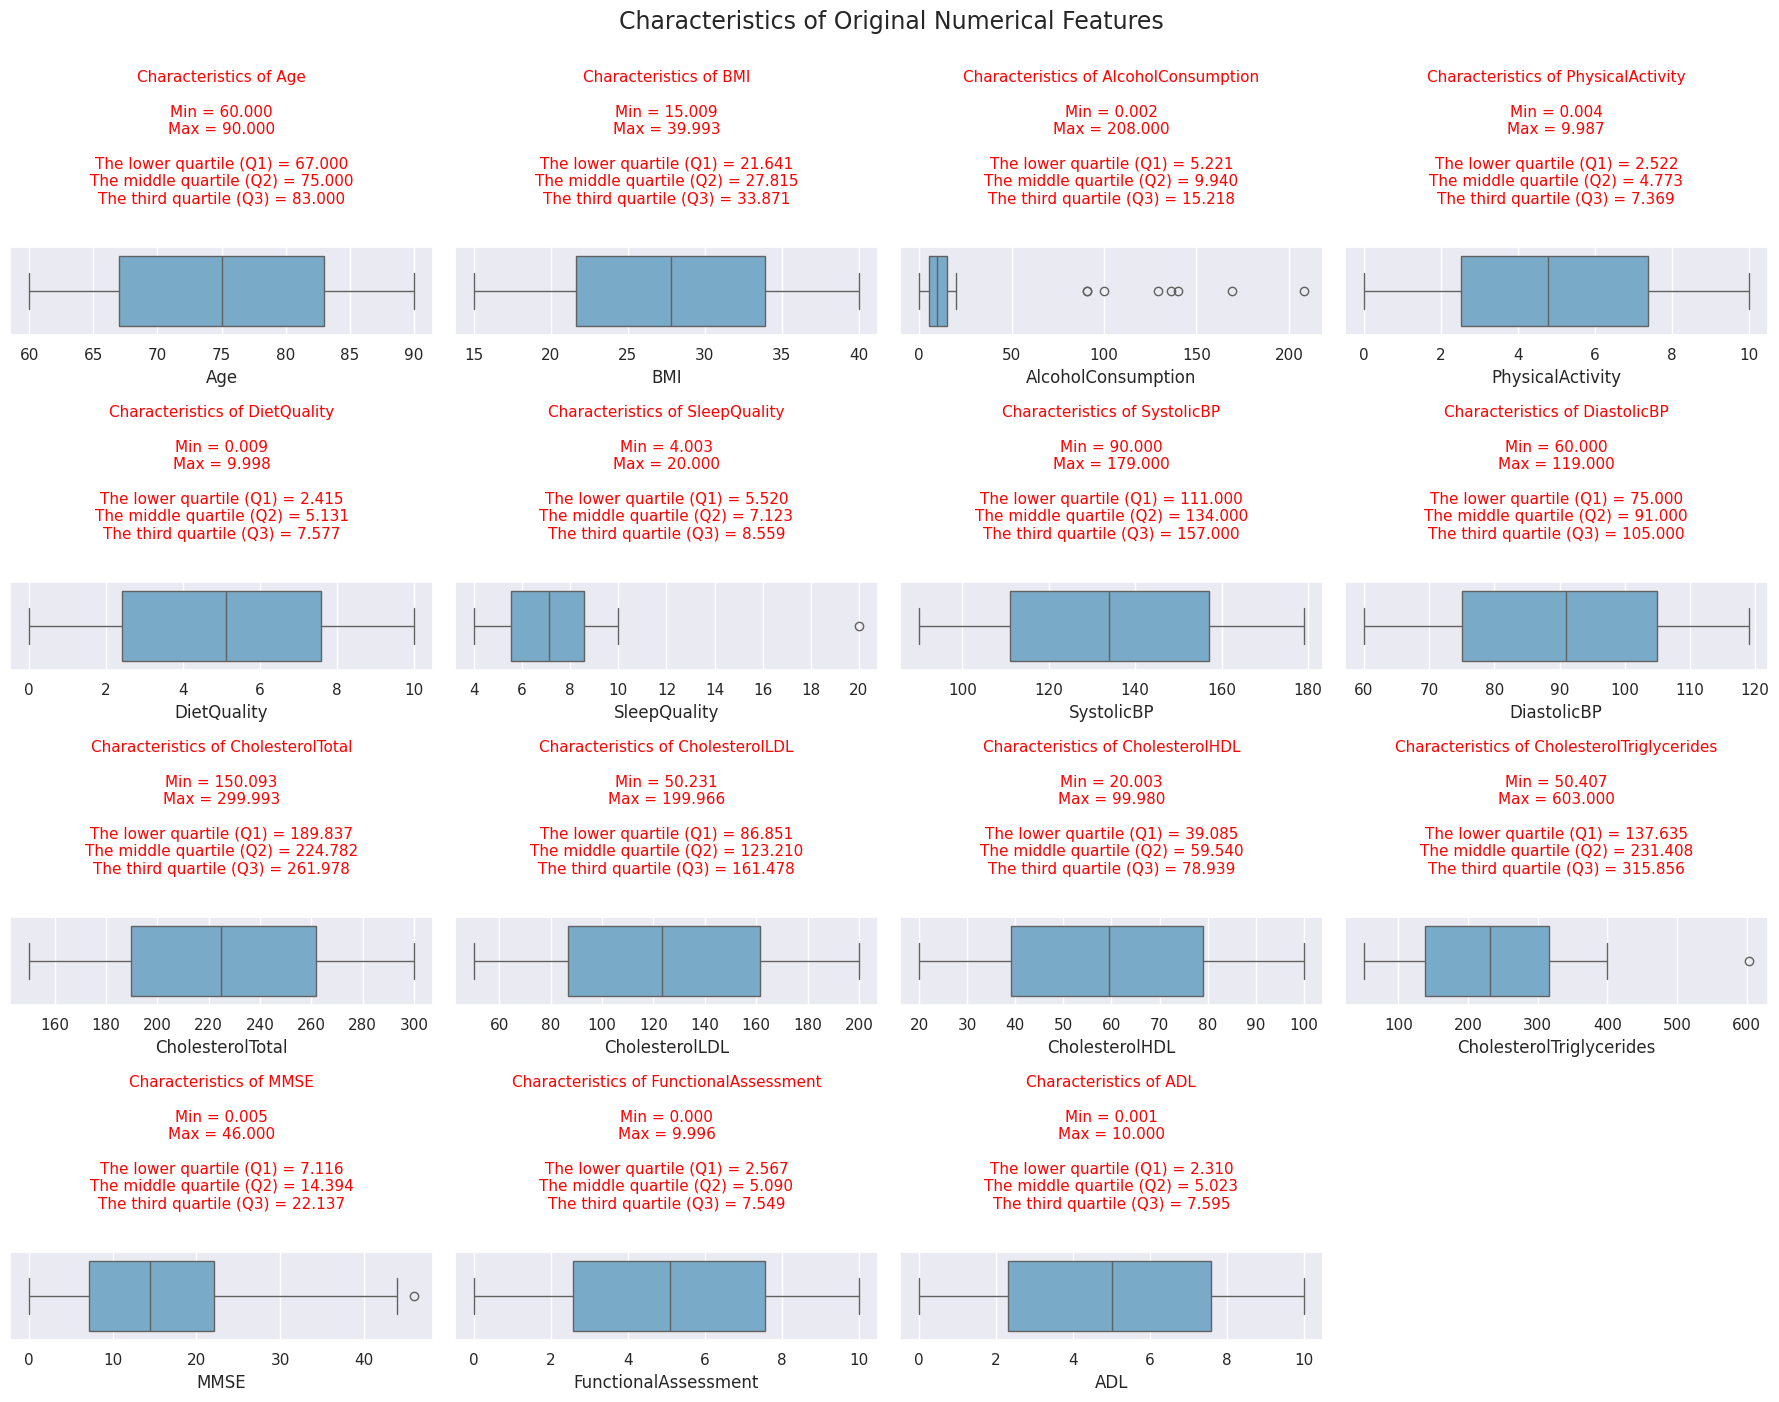

In [ ]:
min = alzheimer_df[numerical_features].min()
max = alzheimer_df[numerical_features].max()
quantile_q2 = alzheimer_df[numerical_features].quantile(0.5)
quantile_q1 = alzheimer_df[numerical_features].quantile(0.25)
quantile_q3 = alzheimer_df[numerical_features].quantile(0.75)
# outlier_ratios = 


num_cols = 4
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3.5 * num_rows))

axes = axes.ravel()

fig.suptitle("Characteristics of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(numerical_features):

    ax = axes[i]
    ax.set_ylabel("", fontsize=10)
    ax.set_title(f'Characteristics of {column}\n\n'
                 f'Min = {min[i]:,.3f}\n'
                 f'Max = {max[i]:,.3f}\n\n'
                 f'The lower quartile (Q1) = {quantile_q1[i]:,.3f}\n'
                 f'The middle quartile (Q2) = {quantile_q2[i]:,.3f}\n'
                 f'The third quartile (Q3) = {quantile_q3[i]:,.3f}\n\n'
                #  f'Outlier ratio = {outlier_ratios[i]:,.3f}\n\n'
                 ,
                fontsize=11, 
                color='red')
    
    sns.boxplot(alzheimer_df[column], ax=ax, orient='h', palette='Blues_r')


# Remove empty subplots if necessary
if len(numerical_features) < num_cols * num_rows:
    for i in range(len(numerical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Correlation of all numerical features with Diagnosis

In [ ]:
corr = alzheimer_df[numerical_features + ['Diagnosis']].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 10},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='x', labelsize=10, rotation=45)
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (SalePrice Correlation (>= ABS(0.5)) Sorted By Absolute SalePrice Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

ValueError: could not convert string to float: 'No'

In [ ]:
corr = alzheimer_df[numerical_features + ['Diagnosis']].corr()
corr

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis
Age,1.000000,-0.015677,0.007323,-0.010249,-0.023386,0.049139,-0.005324,-0.004462,0.000392,0.003588,0.006803,-0.003062,-0.004235,0.005508,-0.038658,-0.005488
BMI,-0.015677,1.000000,-0.008997,0.000742,0.019922,-0.005975,-0.019275,-0.002524,0.001082,0.023684,0.038605,-0.018001,-0.003477,-0.030501,-0.009788,0.026343
AlcoholConsumption,0.007323,-0.008997,1.000000,0.021696,0.020117,-0.003873,-0.030070,-0.008909,-0.033944,-0.017042,-0.001925,0.023362,-0.011424,-0.016483,-0.008250,-0.007618
PhysicalActivity,-0.010249,0.000742,0.021696,1.000000,0.011085,-0.001823,-0.004811,-0.010555,0.014335,0.017789,-0.001993,0.027416,-0.008342,-0.002419,-0.013324,0.005945
DietQuality,-0.023386,0.019922,0.020117,0.011085,1.000000,0.051295,0.006031,0.009539,-0.016790,-0.023698,-0.008659,0.034734,0.021636,-0.009700,-0.007888,0.008506
SleepQuality,0.049139,-0.005975,-0.003873,-0.001823,0.051295,1.000000,-0.027887,0.010797,0.006879,0.006751,0.015453,0.024004,0.012506,0.029589,0.014535,-0.056548
SystolicBP,-0.005324,-0.019275,-0.030070,-0.004811,0.006031,-0.027887,1.000000,0.002590,0.018537,-0.007295,0.002947,-0.034824,-0.003548,0.013161,0.015447,-0.015615
DiastolicBP,-0.004462,-0.002524,-0.008909,-0.010555,0.009539,0.010797,0.002590,1.000000,0.015249,-0.015542,0.008180,-0.007928,-0.028586,0.031485,-0.004836,0.005293
CholesterolTotal,0.000392,0.001082,-0.033944,0.014335,-0.016790,0.006879,0.018537,0.015249,1.000000,0.010336,0.010116,-0.001959,-0.013638,-0.005345,0.000775,0.006394
CholesterolLDL,0.003588,0.023684,-0.017042,0.017789,-0.023698,0.006751,-0.007295,-0.015542,0.010336,1.000000,-0.037148,-0.005582,0.025383,-0.016215,-0.019380,-0.031976


In [ ]:
corr_with_diagnosis = alzheimer_df[["Diagnosis", "Age"]].corr()
corr_with_diagnosis

,Diagnosis,Age
Diagnosis,1.000000,-0.005488
Age,-0.005488,1.000000


### Categorical features Exploration

In [ ]:
alzheimer_df.describe(include='object').transpose()

,count,unique,top,freq
Gender,1762,2,Male,891
Ethnicity,2352,4,Caucasian,1408
EducationLevel,1862,3,High School,934
Smoking,1647,2,No,1167
FamilyHistoryAlzheimers,2352,2,No,1759
CardiovascularDisease,2352,2,No,2017
Diabetes,2352,2,No,1999
Depression,1593,2,No,1275
HeadInjury,2019,2,No,1829
Hypertension,2352,2,No,2004


### Categorical features

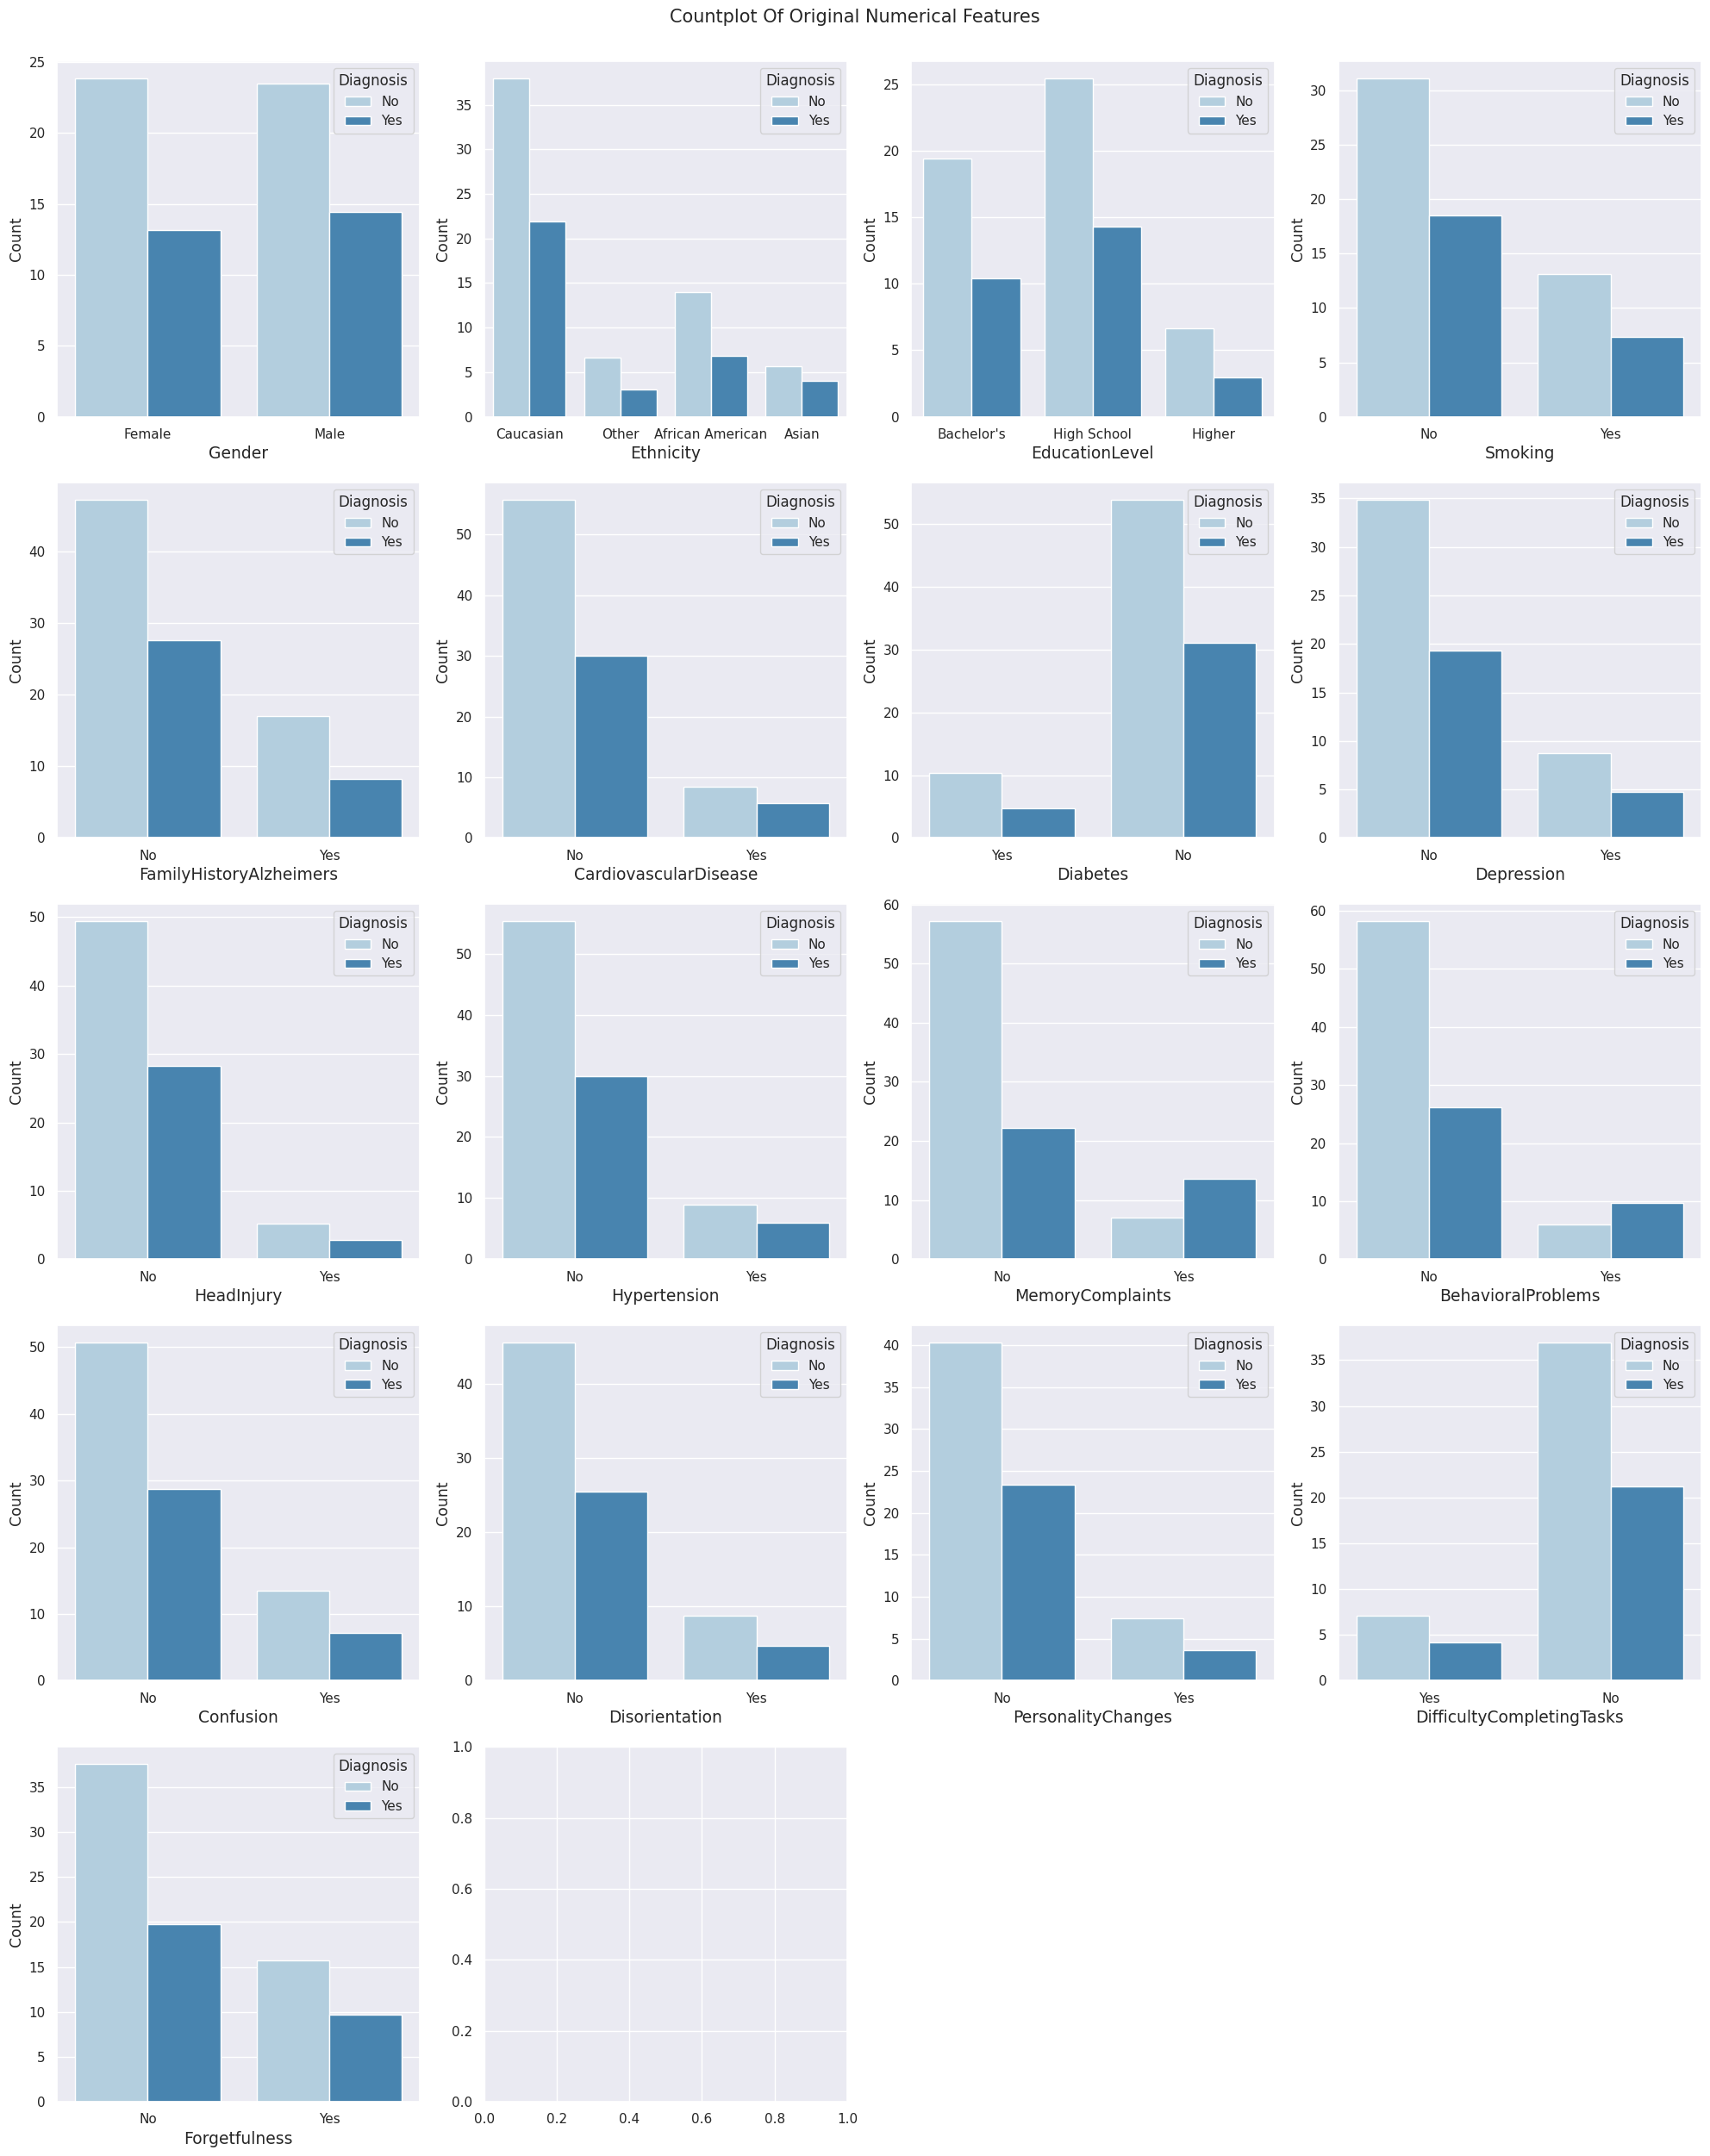

In [ ]:
num_cols = 4
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Countplot Of Original Numerical Features", y=1, fontsize=15)


for i, column in enumerate(categorical_features):

    if column == "Diagnosis":
        continue

    ax = axes[i]
    sns.countplot(data=alzheimer_df, 
                  x=column, ax=ax, 
                  palette='Blues', 
                  hue=alzheimer_df['Diagnosis'],    
                  stat='percent')
    
    # discrete_values = alzheimer_df[[column,'Diagnosis']].value_counts(normalize=True)
    # discrete_values = discrete_values.reset_index()
    # discrete_values = discrete_values.set_index(column)


    # range_of = discrete_values.shape[0] // 2

    # if range_of == 2:
    #     for i in range(range_of):
    #         ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.15 * range_of ,7), fontsize=13, )
    #         ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.05 * range_of, 5), fontsize=13,)

    # if range_of == 3:
    #     for i in range(range_of):
    #         ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.1 * range_of ,7), fontsize=12)
    #         ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.02 * range_of, 5), fontsize=12)

    # if range_of == 4:
    #     for i in range(range_of):
    #         ax.annotate(f'{discrete_values.loc[i]['proportion'].values[0]:,.2f}', xy=(i - 0.1 * range_of ,7), fontsize=11)
    #         ax.annotate(f'{discrete_values.loc[i]['proportion'].values[1]:,.2f}', xy=(i + 0.01 * range_of, 5), fontsize=11)
            
    ax.set_xlabel(column, fontsize=13.5)
    ax.set_ylabel('Count', fontsize=12.5)


    
# Remove empty subplots if necessary
if len(categorical_features) < num_cols * num_rows:
    for i in range(len(categorical_features), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()


### Correlation of all categorical feature with Diagnosis

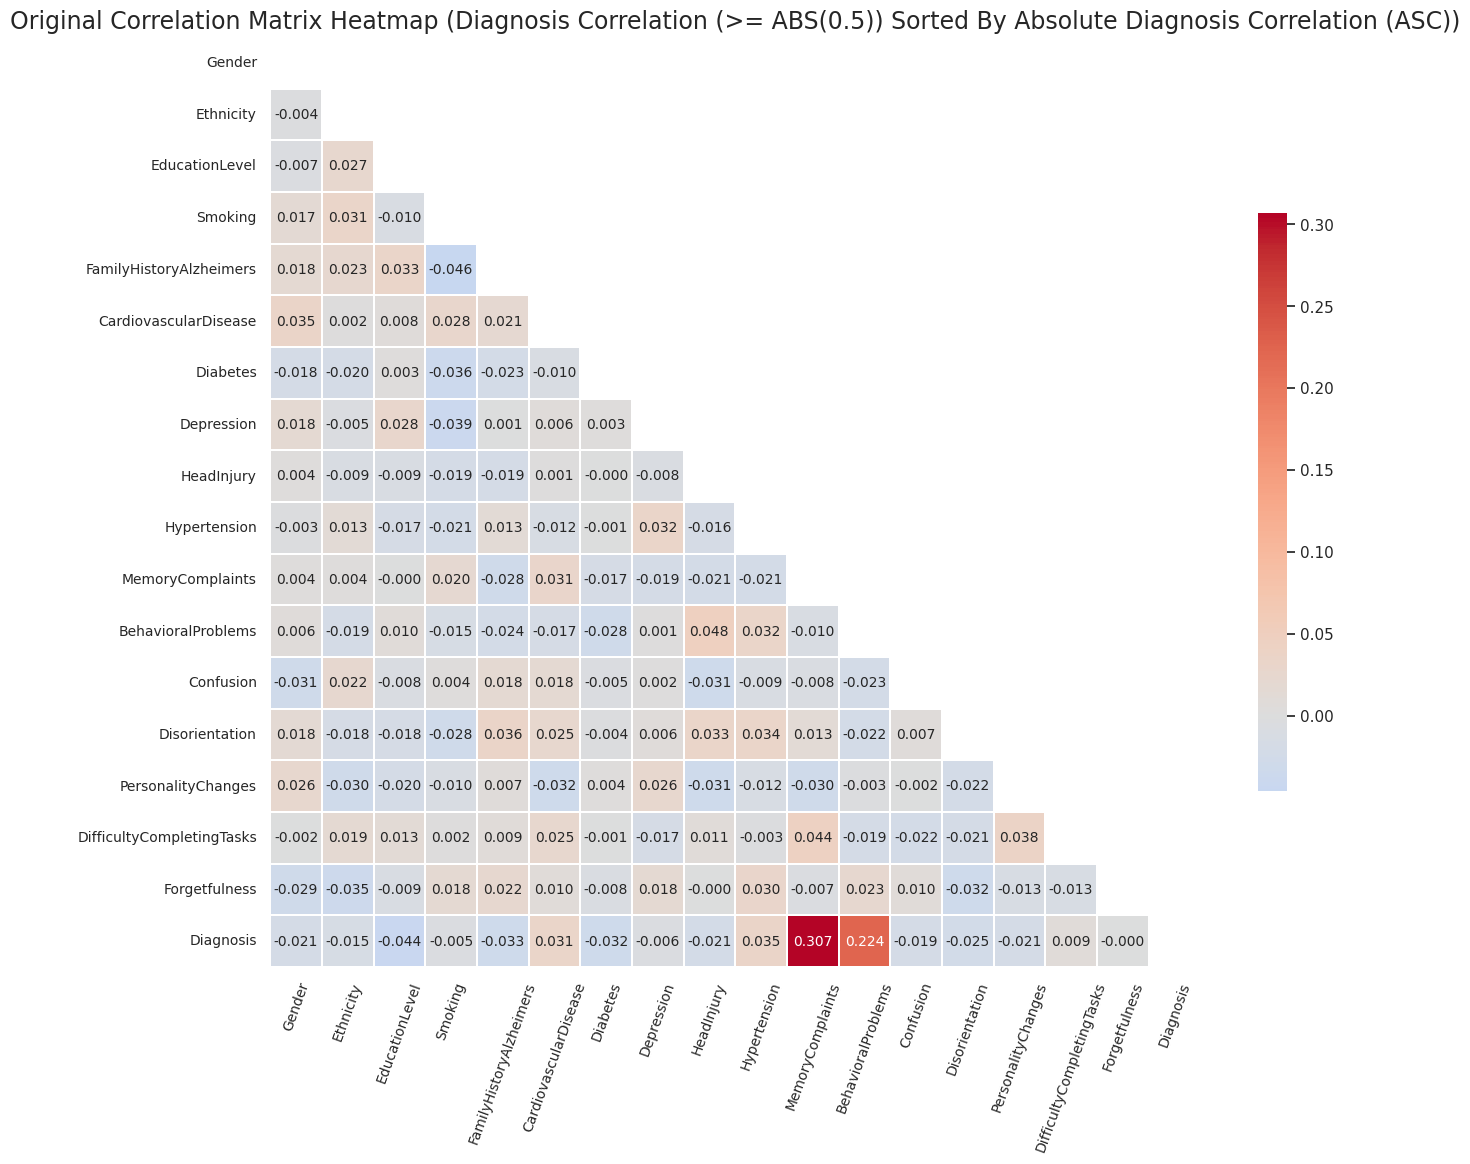

In [ ]:
corr = alzheimer_df[categorical_features].corr()

# Create a mask to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
            annot=True, fmt=".3f", annot_kws={"fontsize": 10},
            linecolor='white', cbar=True)

# Set x and y label font size
ax.tick_params(axis='x', labelsize=10, rotation=70)
ax.tick_params(axis='y', labelsize=10, rotation=360)


plt.title("Original Correlation Matrix Heatmap (Diagnosis Correlation (>= ABS(0.5)) Sorted By Absolute Diagnosis Correlation (ASC))", fontsize=17)

# Remove grid lines from the upper-right triangle
ax.set_facecolor('white')
plt.show()

## Target Feature Exploratory (Diagnosis)

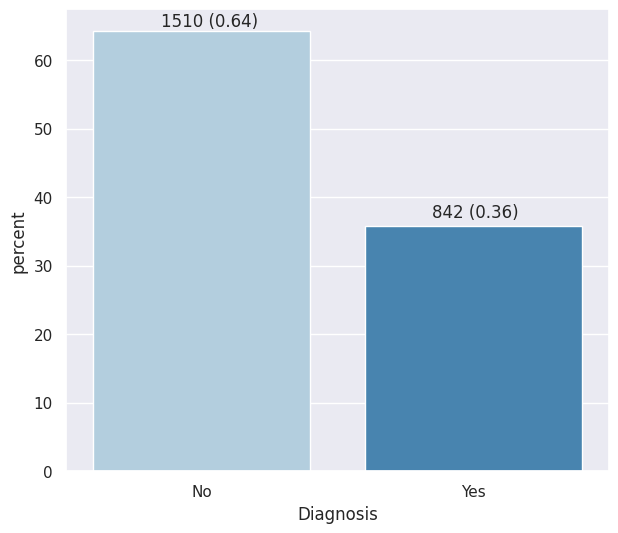

In [ ]:
diagnosis_count = alzheimer_df['Diagnosis'].value_counts()
diagnosis_ratio = alzheimer_df["Diagnosis"].value_counts(normalize=True)

plt.figure(figsize=(7, 6))

sns.countplot(data=alzheimer_df,
                  x='Diagnosis', 
                  palette='Blues', 
                  hue=alzheimer_df['Diagnosis'],    
                  stat='percent')

plt.text(x=-0.15, y=65, s=f"{diagnosis_count[0]} ({diagnosis_ratio[0]:.2f})")
plt.text(x=0.85, y=37, s=f"{diagnosis_count[1]} ({diagnosis_ratio[1]:.2f})")

plt.show()



0.6420068027210885

## Preprocessing Data

- *outlier*
- *missing value*
- *class imbalanced*


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.pipeline import Pipeline

In [ ]:

X = alzheimer_df.drop(columns={'Diagnosis'})
y = alzheimer_df[['Diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

### Rescaling Numerical Features

In [ ]:

rescaling_pipeline = Pipeline(steps=[
    ('RobustScalar', RobustScaler(with_centering=True, 
                                with_scaling=True, 
                                quantile_range=(25.0, 75.0), 
                                copy=True,)),

    ('MinMaxScalar', MinMaxScaler(feature_range=(0,1))),
])


X_train[numerical_features] = rescaling_pipeline.fit_transform(X_train[numerical_features])
X_test[numerical_features] = rescaling_pipeline.transform(X_test[numerical_features])


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1719.0,0.500931,0.297337,0.0,0.266667,0.500000,0.766667,1.0
Gender,1719.0,0.501454,0.500143,0.0,0.000000,1.000000,1.000000,1.0
Ethnicity,1719.0,0.706806,0.997736,0.0,0.000000,0.000000,1.000000,3.0
EducationLevel,1719.0,1.297848,0.906419,0.0,1.000000,1.000000,2.000000,3.0
BMI,1719.0,0.509590,0.288192,0.0,0.268191,0.517642,0.762517,1.0
Smoking,1719.0,0.286213,0.452122,0.0,0.000000,0.000000,1.000000,1.0
AlcoholConsumption,1719.0,0.500720,0.289040,0.0,0.252630,0.493643,0.764527,1.0
PhysicalActivity,1719.0,0.492977,0.285036,0.0,0.257251,0.480552,0.744265,1.0
DietQuality,1719.0,0.497797,0.290783,0.0,0.241824,0.508522,0.755121,1.0
SleepQuality,1719.0,0.510935,0.292897,0.0,0.254113,0.523550,0.760165,1.0


### Feature Engineering 

## Modeling

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.cluster import KMeans

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

svc = SVC()
naive = GaussianNB()
logistic = LogisticRegression()
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()

light = LGBMClassifier()
cat = CatBoostClassifier()

base_models = [svc, naive, logistic, forest, tree, knn, ada, light]



### Validating base model

In [ ]:
classification_train_reports = {}
classification_test_reports = {}
confusion_matrixes_test_set = {}
confusion_matrixes_train_set = {}

def validate_model(base_models, X_true, y_true):

    confusion_matrixes = {}
    classification_reports = {}

    for model in base_models:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_true)

        confusion_matrixes[model.__class__.__name__ ] = (confusion_matrix(y_pred, y_true))
        classification_reports[model.__class__.__name__ ] = classification_report(y_pred, y_true)

    return confusion_matrixes, classification_reports


confusion_matrixes_train_set, classification_train_reports = validate_model(base_models, X_train, y_train)
confusion_matrixes_test_set, classification_test_reports = validate_model(base_models, X_test, y_test)
    

[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3279
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387
[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3279
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM]

### Confusion matrix for train set

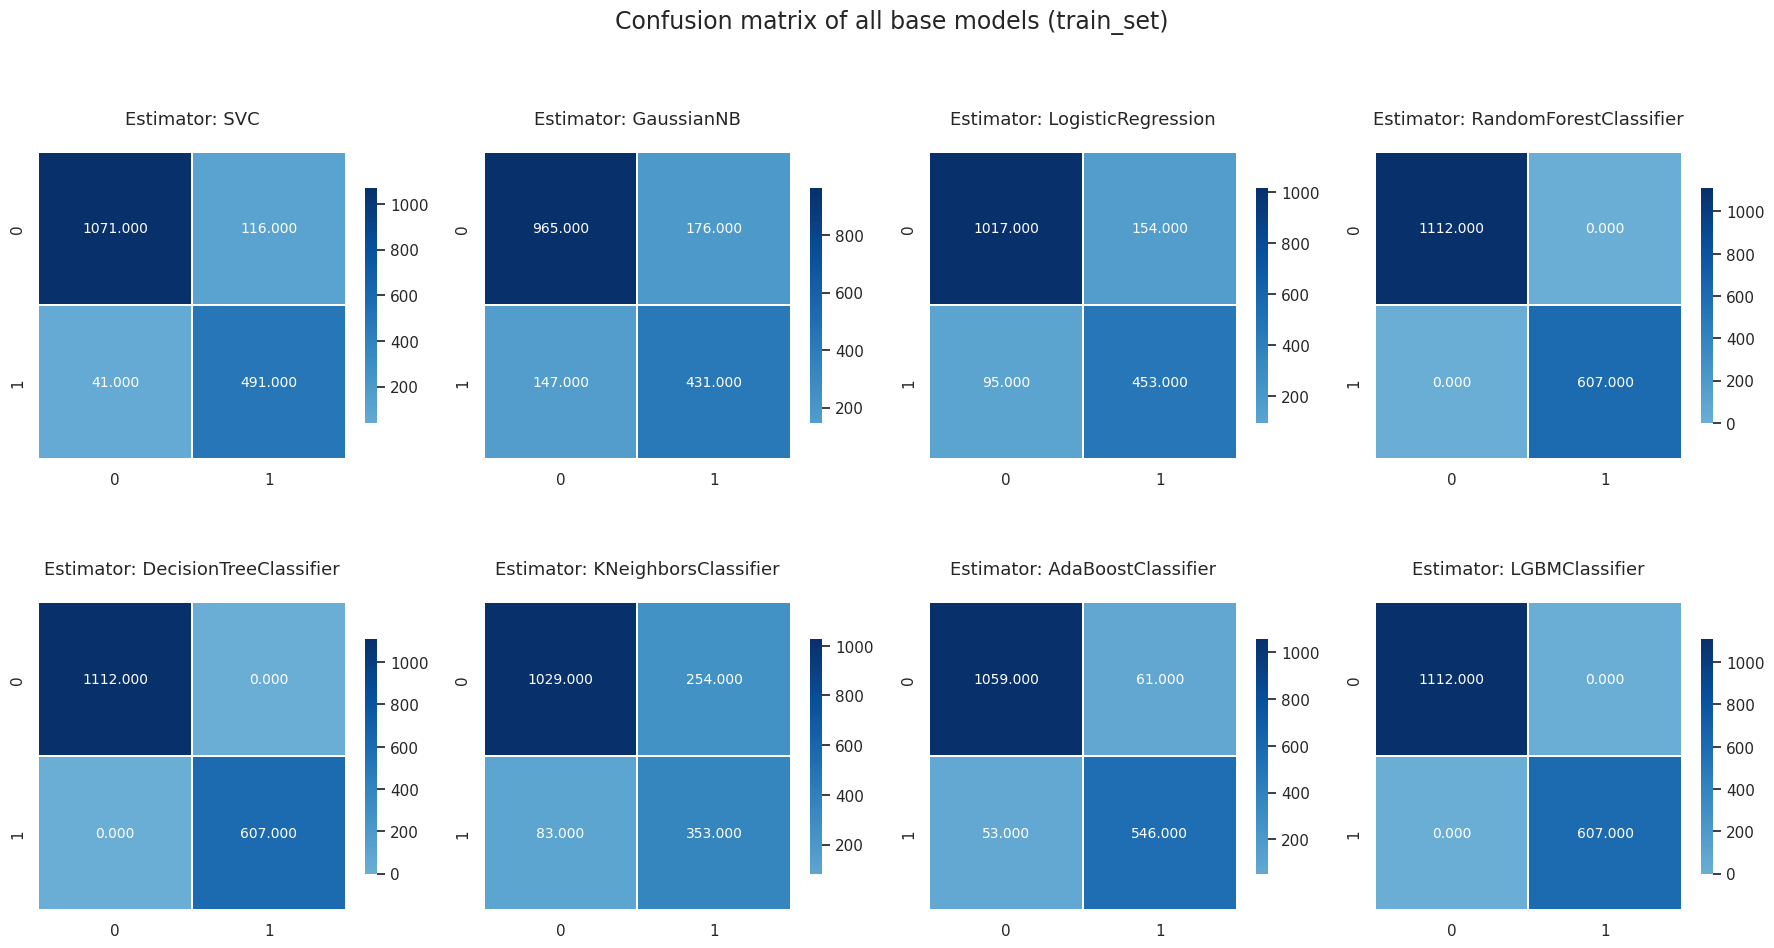

In [ ]:


num_cols = 4
num_rows = (len(confusion_matrixes_train_set) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Confusion matrix of all base models (train_set)", y=1, fontsize=17)

for i, model_name in enumerate(confusion_matrixes_train_set):

    ax = axes[i]

    sns.heatmap(confusion_matrixes_train_set[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)

    ax.set_title(f"Estimator: {model_name}", fontsize=13,pad=20)


# Remove empty subplots if necessary
if len(confusion_matrixes_train_set) < num_cols * num_rows:
    for i in range(len(confusion_matrixes_train_set), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()

#### Top 3 best model

- DecisionTreeClassifier
- LGBMClassifier
- RandomForestClassifier



### Confusion matrix for test set

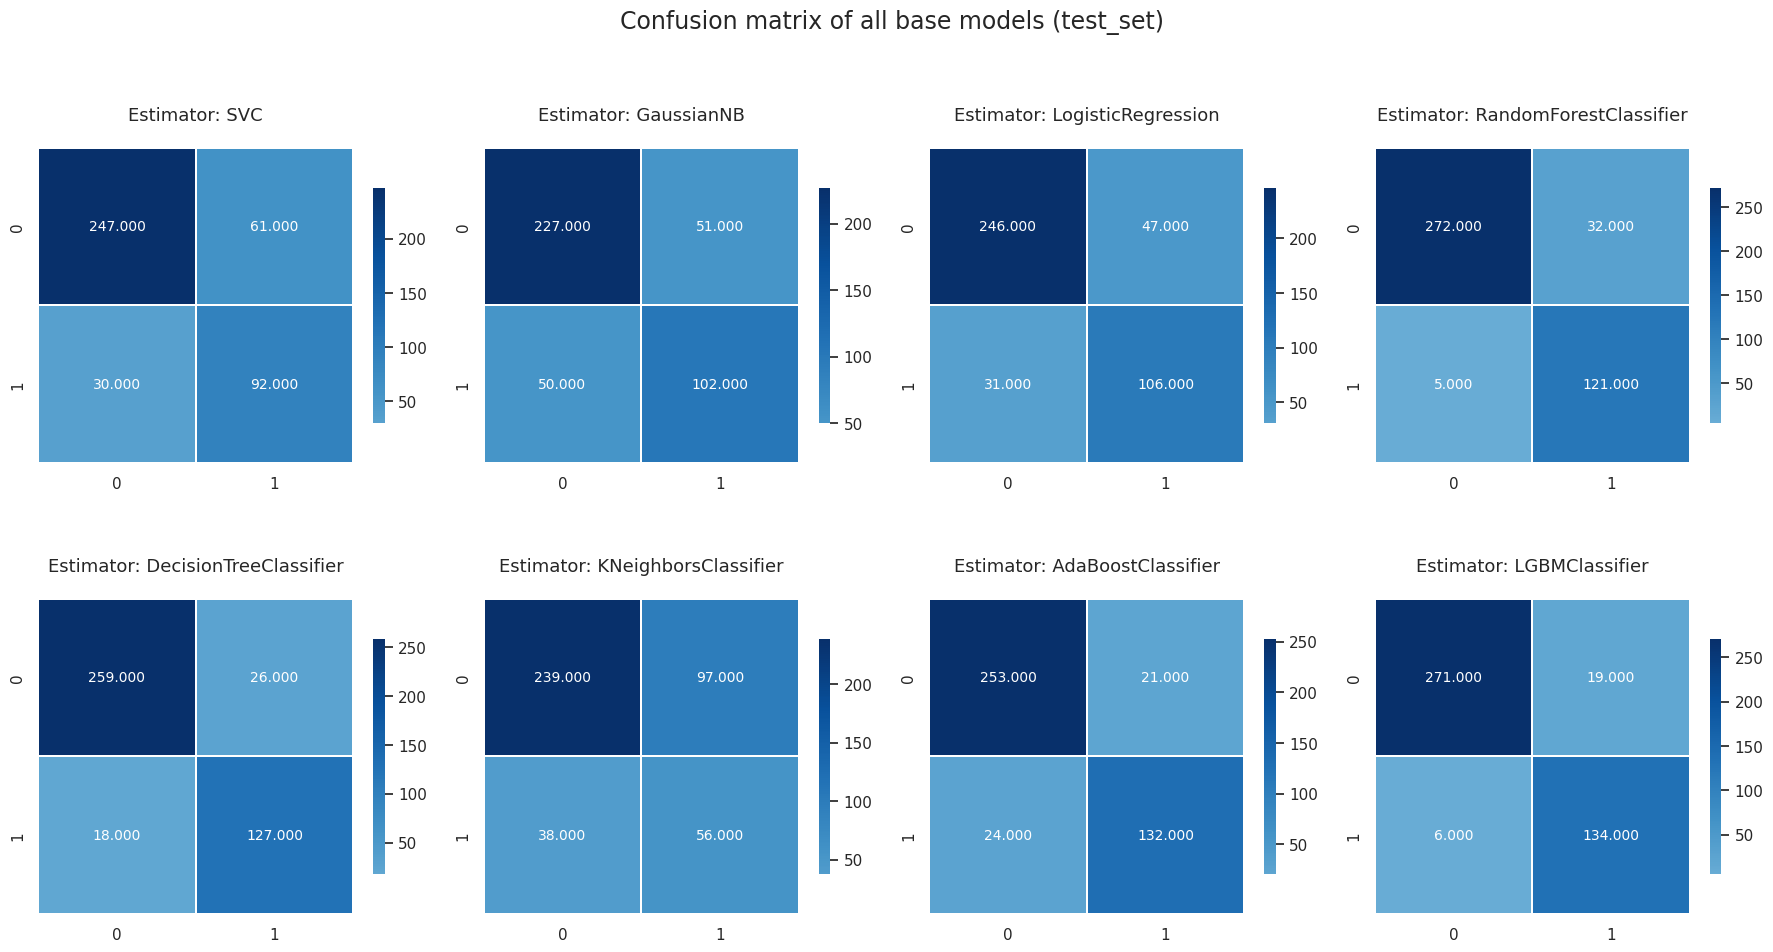

In [ ]:


num_cols = 4
num_rows = (len(confusion_matrixes_test_set) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Confusion matrix of all base models (test_set)", y=1, fontsize=17)

for i, model_name in enumerate(confusion_matrixes_test_set):

    ax = axes[i]

    sns.heatmap(confusion_matrixes_test_set[model_name],  cmap='Blues', center=0,
                square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
                annot=True, fmt=".3f", annot_kws={"fontsize": 10},
                linecolor='white', cbar=True, ax=ax)

    ax.set_title(f"Estimator: {model_name}", fontsize=13,pad=20)


# Remove empty subplots if necessary
if len(confusion_matrixes_test_set) < num_cols * num_rows:
    for i in range(len(confusion_matrixes_test_set), num_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust spacing between subplots
plt.show()

#### Top 4 best model

- LGBMClassifier
- RandomForestClassifier
- AdaBoostClassifier
- SVC

### Classification reports

In [ ]:
def make_classification_reports(reports, name_set):

    # initialize DataFrame
    df_reports = pd.DataFrame()
    df_break = pd.DataFrame([0]).transpose()

    for model_name, report in reports.items():

        df_report = pd.DataFrame([line.split(' '*6) for line in report.split('\n')], 
                    columns=['Metric','Class', 'Precision', 'Recall', 'F1score', 'support']).dropna()
        df_report = pd.concat([df_report,df_break])
        df_report['Model_name'] = pd.Series([model_name]*6)
        df_report.set_index(['Model_name', 'Metric'],inplace=True,)
        df_report.fillna(' ', inplace=True)
        df_report.reset_index()

        df_reports = pd.concat([df_reports,df_report])

    # Drop unimportant column
    df_reports.drop(columns={0, 'support'}, inplace=True)

    # creating hierarchical column name
    tups = zip(*[[name_set]*4,df_report.columns])
    df_reports.columns = pd.MultiIndex.from_tuples(tups )

    return  df_reports

# concatenating training and testing reports
df_reports = pd.concat([
    make_classification_reports(classification_train_reports, 'Train_set').assign(I=''),
    make_classification_reports(classification_test_reports, 'Test_set')
], axis=1)
    

df_reports


Train_set                           I Test_set            \
                                        Class Precision Recall  F1score      Class Precision   
Model_name             Metric                                                                  
SVC                                         0      0.96   0.90     0.93          0      0.89   
                                            1      0.81   0.92     0.86          1      0.60   
                           accuracy                                0.91                        
                       NaN                                                                     
GaussianNB                                  0      0.87   0.85     0.86          0      0.82   
                                            1      0.71   0.75     0.73          1      0.67   
                           accuracy                                0.81                        
                       NaN                                                                     
LogisticRegression                          0      0.91   0.87     0.89          0      0.89   
                                            1      0.75   0.83     0.78          1      0.69   
                           accuracy                                0.86                        
                       NaN                                                                     
RandomForestClassifier                      0      1.00   1.00     1.00          0      0.98   
                                            1      1.00   1.00     1.00          1      0.79   
                           accuracy                                1.00                        
                       NaN                                                                     
DecisionTreeClassifier                      0      1.00   1.00     1.00          0      0.94   
                                            1      1.00   1.00     1.00          1      0.83   
                           accuracy                                1.00                        
                       NaN                                                                     
KNeighborsClassifier                        0      0.93   0.80     0.86          0      0.86   
                                            1      0.58   0.81     0.68          1      0.37   
                           accuracy                                0.80                        
                       NaN                                                                     
AdaBoostClassifier                          0      0.95   0.95     0.95          0      0.91   
                                            1      0.90   0.91     0.91          1      0.86   
                           accuracy                                0.93                        
                       NaN                                                                     
LGBMClassifier                              0      1.00   1.00     1.00          0      0.98   
                                            1      1.00   1.00     1.00          1      0.88   
                           accuracy                                1.00                        
                       NaN                                                                     

                                                     
                                    Recall  F1score  
Model_name             Metric                        
SVC                                   0.80     0.84  
                                      0.75     0.67  
                           accuracy            0.79  
                       NaN                           
GaussianNB                            0.82     0.82  
                                      0.67     0.67  
                           accuracy            0.77  
                       NaN                           
LogisticRegression                    0.84     0.86  
                           

*Top 5 base model*

- RandomForestClassifier
- AdaBoostClassifier
- LGBClassifier
- GaussianNB
- DecisionTree
- logisticRegression
- Kneighbor

## Leverage model performance & Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Stratified KFold

### Cross Validation

In [ ]:

def cross_val(model):
    
    cv_result = (model.__class__.__name__ ,cross_validate(model, X, y,scoring=[ 'precision', 'recall', 'f1', 'accuracy',], cv=5, return_train_score=True, verbose=True))

    df_cv = pd.DataFrame(cv_result[1]).mean().to_frame().transpose()
    df_cv['Model'] = cv_result[0]

    df_cv.set_index('Model', inplace=True)
    df_cv.columns = [ 'train_precision','train_recall', 'train_f1', 'train_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_accuracy','fit_time', 'score_time']

    return df_cv

cross_val(tree)



,train_precision,train_recall,train_f1,train_accuracy,test_precision,test_recall,test_f1,test_accuracy,fit_time,score_time
Model,,,,,,,,,,
DecisionTreeClassifier,0.031048,0.018301,0.847581,1.0,0.860526,1.0,0.851032,1.0,0.897578,1.0


### XGBoost

In [ ]:
# xgb = XGBClassifier()

# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.9],
#     'reg_alpha': [0, 0.01, 0.1, 1],
#     'reg_lambda': [0, 0.01, 0.1, 1],
#     'scale_pos_weight': [1, 2, 5]
# }

# grid_search = GridSearchCV(xgb, 
#                            param_grid=param_grid,
#                            verbose=True,
#                            scoring='roc_auc',
#                            cv=5,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

In [ ]:
# y_pred = grid_search.best_estimator_.predict(X_test)

# confusion_mx = confusion_matrix(y_pred, y_test)

# sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
#                 square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
#                 annot=True, fmt=".3f", annot_kws={"fontsize": 10},
#                 linecolor='white', cbar=True, ax=ax)

# print(classification_report(y_pred, y_test))


### Random Forest

In [ ]:
# random_forest = RandomForestClassifier()

# params = {
#     'n_estimators': [50, 200, 300, 500, 1000],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10],
#     'min_weight_fraction_leaf': [0.0, 0.1, 0.2,0.4, 0.5],
#     'max_features': ['sqrt', 'log2', None],
#     'max_leaf_nodes': [None, 10, 20, 30, 50],
#     'max_samples': [None, 0.5, 0.75, 1.0]}

# random_search = RandomizedSearchCV(random_forest,
#                                    param_distributions=params,
#                                    n_iter=50,
#                                    scoring='roc_auc',
#                                    cv=5,
#                                    verbose=3,
#                                    random_state=42,
#                                    n_jobs=-1)

# random_search.fit(X_train, y_train)

In [ ]:
# y_pred = random_search.best_estimator_.predict(X_test)

# confusion_mx = confusion_matrix(y_pred, y_test)

# sns.heatmap(confusion_matrixes[model_name],  cmap='Blues', center=0,
#                 square=True, linewidths=0.01, cbar_kws={"shrink": 0.5}, 
#                 annot=True, fmt=".3f", annot_kws={"fontsize": 10},
#                 linecolor='white', cbar=True, ax=ax)

# print(classification_report(y_pred, y_test))

### SVC (Support Vector Machine)

In [ ]:
svc = SVC()

### Logistic Regression

In [ ]:
logistic = LogisticRegression()

### KNearestNeighbor

In [ ]:
knn = KNeighborsClassifier()

## Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout




2024-10-04 07:06:54.143189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 07:06:54.217701: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 07:06:54.253773: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 07:06:54.405361: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 07:06:55.656549: W tensorflow/compiler/tf2

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, train_size=0.7, random_state=16)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=10)

X_train.shape, X_test.shape


((1504, 32), (323, 32))

In [ ]:
nn_model = keras.Sequential()
nn_model.add(keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(keras.layers.Dense(512, activation='relu'))
nn_model.add(keras.layers.Dense(256, activation='relu'))
nn_model.add(keras.layers.Dense(128, activation='relu'))
nn_model.add(keras.layers.Dense(64, activation='relu'))
nn_model.add(keras.layers.Dense(32, activation='relu'))
nn_model.add(keras.layers.Dropout(0.3))
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))



I0000 00:00:1728000418.364453    5469 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728000418.509054    5469 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728000418.509228    5469 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728000418.510320    5469 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [ ]:
nn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 733,185 (2.80 MB)

 Trainable params: 733,185 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=30,
                           restore_best_weights=True)

In [ ]:
history = nn_model.fit(X_train, y_train,
                       validation_data = (X_val, y_val),
                       epochs = 200,
                       batch_size= 128
                       )

Epoch 1/200


I0000 00:00:1728000421.437242    5892 service.cc:146] XLA service 0x73b2f80057b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728000421.437300    5892 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-10-04 07:07:01.486490: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-04 07:07:01.790293: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4873 - loss: 4.1465

I0000 00:00:1728000424.872457    5892 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - accuracy: 0.5041 - loss: 3.5480 - val_accuracy: 0.6491 - val_loss: 0.6631
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5800 - loss: 0.7773 - val_accuracy: 0.6491 - val_loss: 0.6457
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6342 - loss: 0.6570 - val_accuracy: 0.6491 - val_loss: 0.6385
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6413 - loss: 0.6451 - val_accuracy: 0.6677 - val_loss: 0.6631
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6124 - loss: 0.6651 - val_accuracy: 0.6491 - val_loss: 0.6472
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6254 - loss: 0.6670 - val_accuracy: 0.6491 - val_loss: 0.6651
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5910 - loss: 0.6718 - val_accuracy: 0.6491 - val_loss: 0.6529
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 0.6623 - val_accuracy: 0.6491 - val_loss: 

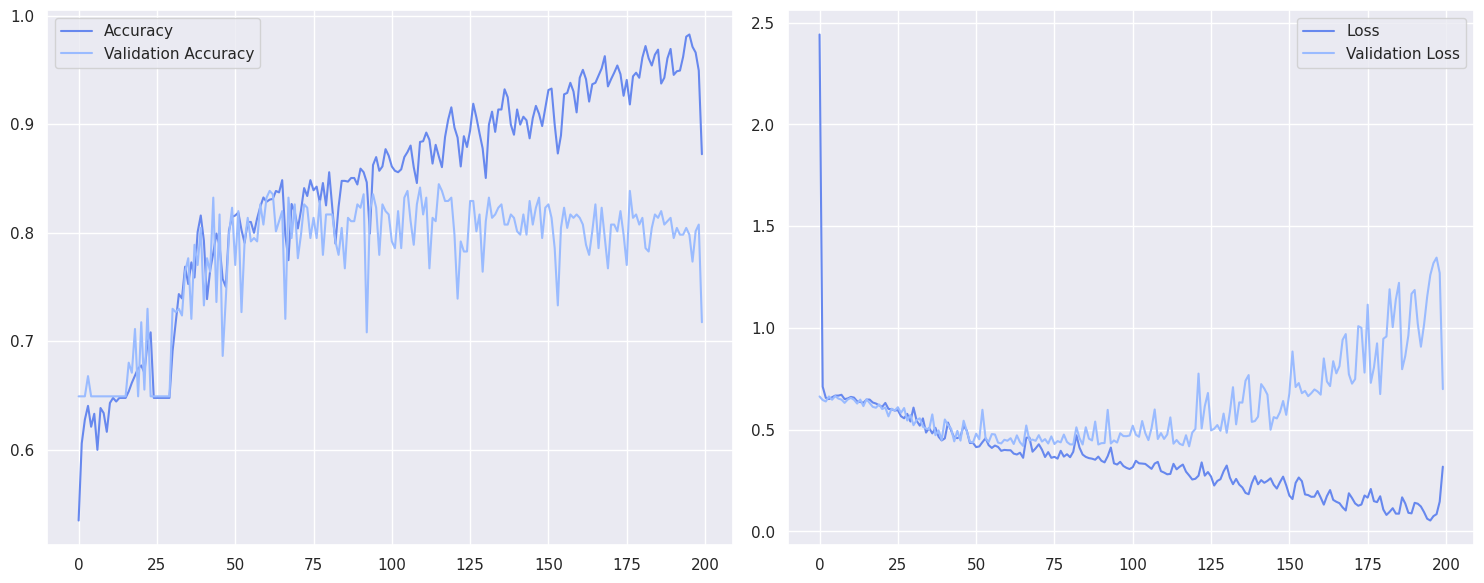

In [ ]:

fig, axes = plt.subplots(1,2, figsize=(15,6))

axes = axes.ravel()

sns.lineplot(history.history['accuracy'], label='Accuracy', ax=axes[0])
sns.lineplot(history.history['val_accuracy'], label='Validation Accuracy', ax=axes[0])

sns.lineplot(history.history['loss'], label='Loss', ax=axes[1])
sns.lineplot(history.history['val_loss'], label='Validation Loss', ax=axes[1])

plt.tight_layout()
plt.legend()
plt.show()

